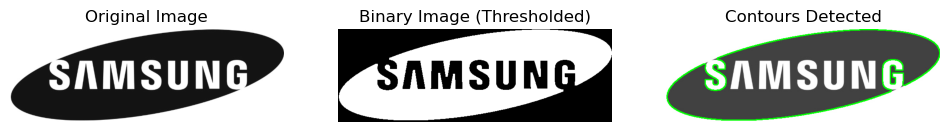

The percentage of negative space in the image is 54.28%


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_negative_space_percentage(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Otsu's thresholding
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Invert the binary image if the background is mistakenly treated as black
    white_pixel_count = np.sum(binary_image == 255)
    black_pixel_count = np.sum(binary_image == 0)
    if white_pixel_count < black_pixel_count:
        binary_image = cv2.bitwise_not(binary_image)

    # Perform morphological opening to remove small noise
    kernel = np.ones((5, 5), np.uint8)
    cleaned_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    # Get total pixels
    total_pixels = cleaned_binary.size

    # Count white pixels (negative space/background)
    background_pixels = np.sum(cleaned_binary == 255)

    # Find contours for foreground objects
    contours, _ = cv2.findContours(cleaned_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the area occupied by foreground objects
    foreground_area = sum(cv2.contourArea(contour) for contour in contours)

    # Calculate the negative space percentage
    negative_space_percentage = (background_pixels / total_pixels) * 100

    # Visualization
    plt.figure(figsize=(12, 4))

    # Show original grayscale image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.axis("off")

    # Show binary image after thresholding and cleaning
    plt.subplot(1, 3, 2)
    plt.title("Binary Image (Thresholded)")
    plt.imshow(cleaned_binary, cmap='gray')
    plt.axis("off")

    # Draw contours on the original image and display
    contour_overlay = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contour_overlay, contours, -1, (0, 255, 0), 2)

    plt.subplot(1, 3, 3)
    plt.title("Contours Detected")
    plt.imshow(cv2.cvtColor(contour_overlay, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.show()

    return negative_space_percentage

# Example usage
image_path = 'samsung.jpg'  # Replace with the path to your image
percentage = calculate_negative_space_percentage(image_path)
print(f"The percentage of negative space in the image is {percentage:.2f}%")

Top 10 colors in the image:
Color: (236, 232, 184), Count: 65
Color: (237, 233, 185), Count: 43
Color: (16, 42, 43), Count: 28
Color: (15, 41, 42), Count: 25
Color: (238, 236, 188), Count: 16
Color: (16, 46, 46), Count: 15
Color: (17, 47, 47), Count: 15
Color: (23, 58, 52), Count: 14
Color: (238, 234, 186), Count: 14
Color: (20, 52, 47), Count: 13


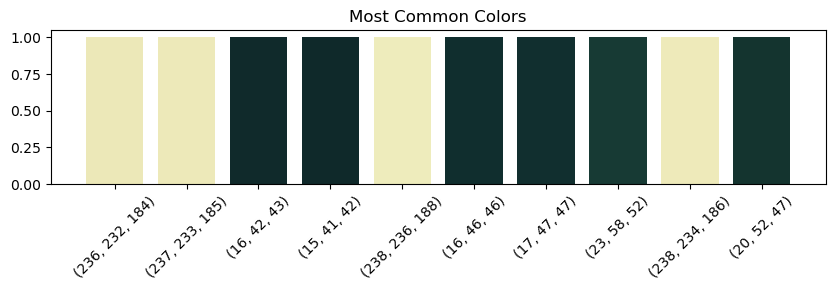

In [1]:
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

def list_colors(image_path, num_colors=10):
    """
    Lists the most common colors in an image.

    :param image_path: Path to the image file.
    :param num_colors: Number of top colors to display.
    """
    # Open the image and convert it to RGB mode
    image = Image.open(image_path).convert("RGB")
    
    # Resize image to speed up processing
    image = image.resize((100, 100))
    
    # Get all pixels as a list of RGB tuples
    pixels = list(image.getdata())
    
    # Count the frequency of each color
    color_counts = Counter(pixels)
    
    # Get the most common colors
    most_common_colors = color_counts.most_common(num_colors)
    
    print(f"Top {num_colors} colors in the image:")
    for color, count in most_common_colors:
        print(f"Color: {color}, Count: {count}")
    
    # Plot the colors
    plt.figure(figsize=(10, 2))
    for i, (color, _) in enumerate(most_common_colors):
        plt.bar(i, 1, color=[c / 255 for c in color])
    plt.xticks(range(num_colors), [str(color) for color, _ in most_common_colors], rotation=45)
    plt.title("Most Common Colors")
    plt.show()

# Example usage
image_path = "C:/Users/Medhavi/Documents/medhavi/green energy.jpg"  # Replace with the path to your image
list_colors(image_path, num_colors=10)


Top 10 colors in the image:
Color: (227, 226, 222), Count: 35
Color: (226, 225, 221), Count: 25
Color: (255, 143, 199), Count: 25
Color: (10, 35, 37), Count: 24
Color: (228, 227, 223), Count: 22
Color: (242, 96, 169), Count: 18
Color: (10, 34, 36), Count: 18
Color: (254, 142, 198), Count: 17
Color: (216, 215, 210), Count: 15
Color: (236, 101, 170), Count: 15


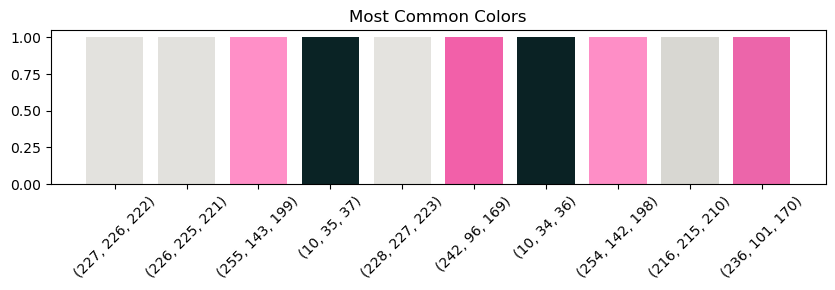

In [5]:
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

def list_colors(image_path, num_colors=10):
    """
    Lists the most common colors in an image.

    :param image_path: Path to the image file.
    :param num_colors: Number of top colors to display.
    """
    # Open the image and convert it to RGB mode
    image = Image.open(image_path).convert("RGB")
    
    # Resize image to speed up processing
    image = image.resize((100, 100))
    
    # Get all pixels as a list of RGB tuples
    pixels = list(image.getdata())
    
    # Count the frequency of each color
    color_counts = Counter(pixels)
    
    # Get the most common colors
    most_common_colors = color_counts.most_common(num_colors)
    
    print(f"Top {num_colors} colors in the image:")
    for color, count in most_common_colors:
        print(f"Color: {color}, Count: {count}")
    
    # Plot the colors
    plt.figure(figsize=(10, 2))
    for i, (color, _) in enumerate(most_common_colors):
        plt.bar(i, 1, color=[c / 255 for c in color])
    plt.xticks(range(num_colors), [str(color) for color, _ in most_common_colors], rotation=45)
    plt.title("Most Common Colors")
    plt.show()

# Example usage
image_path = "amazon6.jpg"  # Replace with the path to your image
list_colors(image_path, num_colors=10)


Top 10 colors in the image with their names:
Color: (227, 226, 222), Name: gainsboro, Count: 35
Color: (226, 225, 221), Name: gainsboro, Count: 25
Color: (255, 143, 199), Name: lightpink, Count: 25
Color: (10, 35, 37), Name: black, Count: 24
Color: (228, 227, 223), Name: gainsboro, Count: 22
Color: (242, 96, 169), Name: hotpink, Count: 18
Color: (10, 34, 36), Name: black, Count: 18
Color: (254, 142, 198), Name: lightpink, Count: 17
Color: (216, 215, 210), Name: lightgrey, Count: 15
Color: (236, 101, 170), Name: hotpink, Count: 15


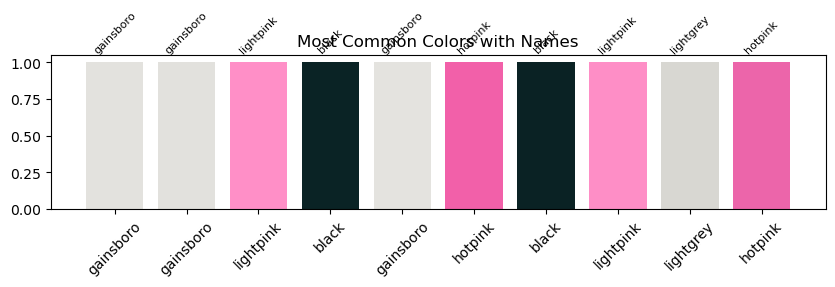

In [25]:
from PIL import Image
from collections import Counter
import webcolors
import matplotlib.pyplot as plt

def closest_colour(requested_colour):
    """
    Find the closest color name using CSS3 color names.
    """
    min_colours = {}
    for name in webcolors.names("css3"):
        r_c, g_c, b_c = webcolors.name_to_rgb(name)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_color_name(rgb_color):
    """
    Get the exact or closest color name for the given RGB value.
    """
    try:
        # Check for exact match
        return webcolors.rgb_to_name(rgb_color)
    except ValueError:
        # Get the closest match if no exact name exists
        return closest_colour(rgb_color)

def list_colors_with_names(image_path, num_colors=10):
    """
    Lists the most common colors in an image along with their color names.

    :param image_path: Path to the image file.
    :param num_colors: Number of top colors to display.
    """
    # Open the image and convert it to RGB mode
    image = Image.open(image_path).convert("RGB")

    # Resize the image to speed up processing
    image = image.resize((100, 100))

    # Get all pixels as a list of RGB tuples
    pixels = list(image.getdata())

    # Count the frequency of each color
    color_counts = Counter(pixels)

    # Get the most common colors
    most_common_colors = color_counts.most_common(num_colors)

    print(f"Top {num_colors} colors in the image with their names:")
    color_names = []
    for color, count in most_common_colors:
        color_name = get_color_name(color)
        color_names.append((color_name, color, count))
        print(f"Color: {color}, Name: {color_name}, Count: {count}")

    # Plot the colors
    plt.figure(figsize=(10, 2))
    for i, (name, rgb, _) in enumerate(color_names):
        plt.bar(i, 1, color=[c / 255 for c in rgb])
        plt.text(i, 1.05, name, rotation=45, ha='center', va='bottom', fontsize=8)
    plt.xticks(range(num_colors), [name for name, _, _ in color_names], rotation=45)
    plt.title("Most Common Colors with Names")
    plt.show()


# Example usage
image_path = "amazon6.jpg"  # Replace with the path to your image
list_colors_with_names(image_path, num_colors=10)


Top 10 colors in the image:
Color: (19, 25, 33), Count: 4424, Category: Neutral
Color: (255, 255, 255), Count: 1244, Category: Neutral
Color: (18, 24, 32), Count: 196, Category: Neutral
Color: (255, 98, 0), Count: 163, Category: Warm
Color: (15, 21, 29), Count: 105, Category: Neutral
Color: (17, 23, 31), Count: 78, Category: Neutral
Color: (22, 28, 36), Count: 76, Category: Neutral
Color: (14, 20, 28), Count: 73, Category: Neutral
Color: (255, 99, 0), Count: 72, Category: Warm
Color: (16, 22, 30), Count: 52, Category: Neutral

Color Composition:
Warm: 3.62%
Cool: 0.00%
Neutral: 96.38%


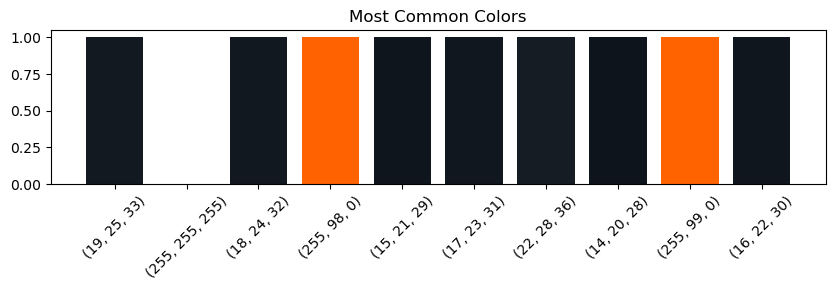

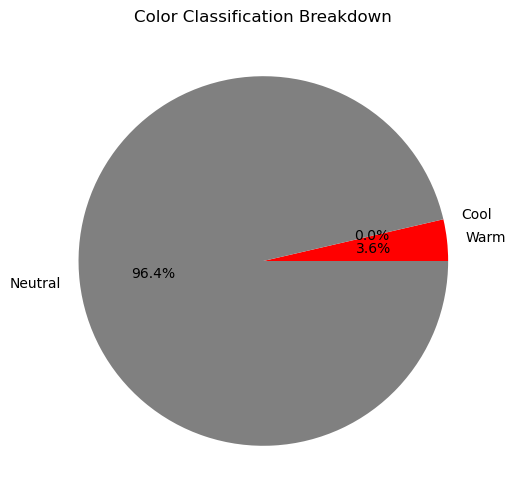

In [31]:
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

def classify_color(rgb):
    """
    Classifies a given RGB color as warm, cool, or neutral.
    Warm: Red, Orange, Yellow shades
    Cool: Blue, Green, Purple shades
    Neutral: Grayscale shades (Black, White, Gray)
    """
    r, g, b = rgb
    
    # Check for neutral tones (grayish colors)
    if abs(r - g) < 15 and abs(g - b) < 15 and abs(r - b) < 15:
        return "Neutral"
    
    # Check for warm tones
    if (r > g and r > b) or (r >= 150 and g >= 100 and b < 80):
        return "Warm"
    
    # Otherwise, classify as cool
    return "Cool"

def list_colors(image_path, num_colors=10):
    """
    Lists the most common colors in an image and classifies them as warm, cool, or neutral.
    
    :param image_path: Path to the image file.
    :param num_colors: Number of top colors to display.
    """
    # Open the image and convert it to RGB mode
    image = Image.open(image_path).convert("RGB")
    
    # Resize image to speed up processing
    image = image.resize((100, 100))
    
    # Get all pixels as a list of RGB tuples
    pixels = list(image.getdata())
    
    # Count the frequency of each color
    color_counts = Counter(pixels)
    
    # Get the most common colors
    most_common_colors = color_counts.most_common(num_colors)
    
    # Classify colors
    classification_counts = {"Warm": 0, "Cool": 0, "Neutral": 0}
    total_pixels = sum(count for _, count in most_common_colors)
    
    print(f"Top {num_colors} colors in the image:")
    for color, count in most_common_colors:
        category = classify_color(color)
        classification_counts[category] += count
        print(f"Color: {color}, Count: {count}, Category: {category}")
    
    # Calculate percentages
    warm_pct = (classification_counts["Warm"] / total_pixels) * 100
    cool_pct = (classification_counts["Cool"] / total_pixels) * 100
    neutral_pct = (classification_counts["Neutral"] / total_pixels) * 100
    
    print("\nColor Composition:")
    print(f"Warm: {warm_pct:.2f}%")
    print(f"Cool: {cool_pct:.2f}%")
    print(f"Neutral: {neutral_pct:.2f}%")
    
    # Plot the colors
    plt.figure(figsize=(10, 2))
    for i, (color, _) in enumerate(most_common_colors):
        plt.bar(i, 1, color=[c / 255 for c in color])
    plt.xticks(range(num_colors), [str(color) for color, _ in most_common_colors], rotation=45)
    plt.title("Most Common Colors")
    plt.show()
    
    # Pie chart of warm/cool/neutral distribution
    plt.figure(figsize=(6, 6))
    plt.pie(classification_counts.values(), labels=classification_counts.keys(), autopct="%1.1f%%", colors=["red", "blue", "gray"])
    plt.title("Color Classification Breakdown")
    plt.show()

# Example usage
image_path = "amazon.png"  # with the path to your image
list_colors(image_path, num_colors=10)


Number of text blocks detected: 1


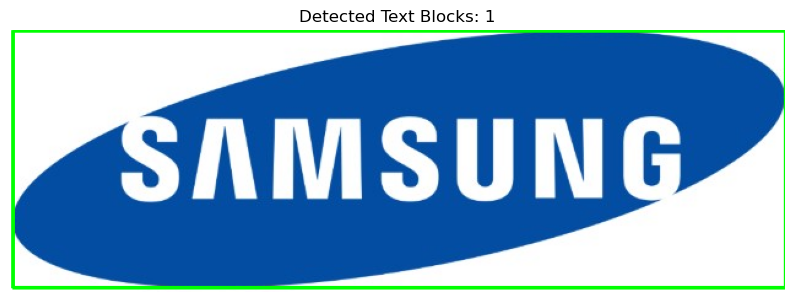

In [37]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "samsung.jpg"  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to preprocess the image
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Find contours of the text regions
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours to identify text blocks
text_blocks = []
for contour in contours:
    # Get bounding box for each contour
    x, y, w, h = cv2.boundingRect(contour)
    # Filter out very small or very large regions (tunable parameters)
    if w > 20 and h > 20:
        text_blocks.append((x, y, w, h))
        # Draw rectangle around detected text block (for visualization)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Count the number of text blocks
num_text_blocks = len(text_blocks)
print(f"Number of text blocks detected: {num_text_blocks}")

# Convert the image from BGR to RGB (Matplotlib uses RGB)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image with text blocks
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title(f"Detected Text Blocks: {num_text_blocks}")
plt.axis("off")  # Hide axes for better visualization
plt.show()


Number of text elements detected: 5
Detected text block heights: [91, 130, 91, 91, 140]
Average text height: 108.60


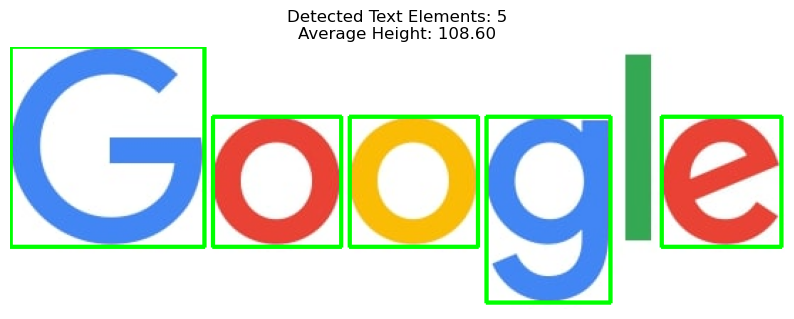

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (update the path to your image file)
image_path = "google.jpg"  # Replace with the correct image path
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    raise FileNotFoundError(f"Image not found at: {image_path}")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding for better text segmentation
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# Use morphological operations to connect letters
kernel = np.ones((3, 3), np.uint8)
thresh = cv2.dilate(thresh, kernel, iterations=1)

# Find contours of the text regions
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on size
text_blocks = []
heights = []
min_area = 50  # Minimum area to consider as a text element

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    area = w * h

    # Filter based on area and aspect ratio
    if area > min_area and 0.2 < w / h < 5:
        text_blocks.append((x, y, w, h))
        heights.append(h)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Sort text blocks left-to-right and top-to-bottom
text_blocks = sorted(text_blocks, key=lambda b: (b[1], b[0]))

# Count the number of text elements detected
num_text_blocks = len(text_blocks)
print(f"Number of text elements detected: {num_text_blocks}")

# Display detected heights
print("Detected text block heights:", heights)

# Compute average text height
avg_height = sum(heights) / len(heights) if heights else 0
print(f"Average text height: {avg_height:.2f}")

# Convert BGR to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.title(f"Detected Text Elements: {num_text_blocks}\nAverage Height: {avg_height:.2f}")
plt.axis("off")
plt.show()


Number of text elements detected: 1
Average height of detected text blocks: 47.00 pixels


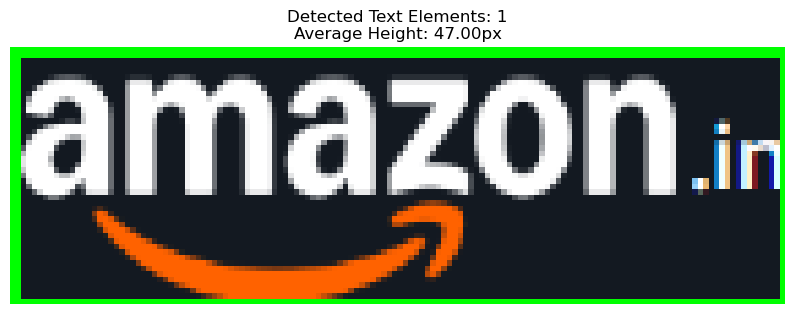

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_text_elements_and_calculate_avg_height(image_path):
    # Load the image (ensure the path is correct)
    image = cv2.imread(image_path)

    # Check if the image was loaded successfully
    if image is None:
        raise FileNotFoundError(f"Image not found at: {image_path}")

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding with fine-tuned parameters
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 2
    )

    # Perform morphological operations for better text connectivity
    kernel = np.ones((2, 2), np.uint8)  # Smaller kernel for thinner letters
    thresh = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours of potential text regions
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on size
    text_blocks = []
    heights = []  # To store the heights of detected text blocks
    min_area = 30  # Lower area threshold for thin letters
    min_aspect_ratio = 0.1  # Adjust aspect ratio for thin contours
    max_aspect_ratio = 10

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h

        # Filter based on area and aspect ratio
        if area > min_area and min_aspect_ratio < w / h < max_aspect_ratio:
            text_blocks.append((x, y, w, h))
            heights.append(h)  # Append the height of the detected block
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw bounding box

    # Calculate average height of detected text blocks
    avg_height = sum(heights) / len(heights) if heights else 0

    # Sort text blocks left-to-right and top-to-bottom
    text_blocks = sorted(text_blocks, key=lambda b: (b[1], b[0]))

    # Count the number of text elements detected
    num_text_blocks = len(text_blocks)
    print(f"Number of text elements detected: {num_text_blocks}")
    print(f"Average height of detected text blocks: {avg_height:.2f} pixels")

    # Convert BGR to RGB for display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title(f"Detected Text Elements: {num_text_blocks}\nAverage Height: {avg_height:.2f}px")
    plt.axis("off")
    plt.show()

# Example usage
image_path = "amazon.png"  # Replace with the correct image path
detect_text_elements_and_calculate_avg_height(image_path)

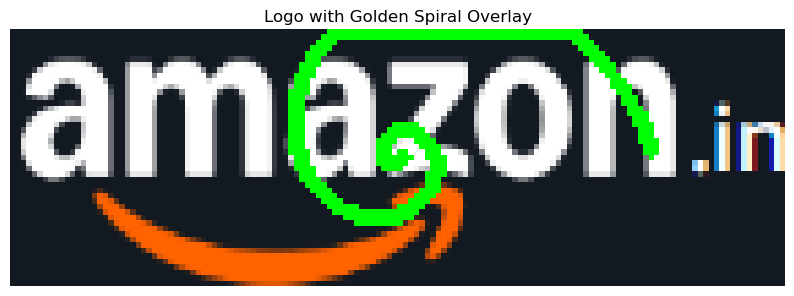

Conformity Score with Golden Ratio: 120.70


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate an equiangular spiral
def generate_golden_spiral(width, height, num_points=1000, a=1):
    """
    Generates points for an equiangular spiral based on the golden ratio.

    :param width: Width of the image
    :param height: Height of the image
    :param num_points: Number of points in the spiral
    :param a: Scaling factor for the spiral
    :return: x and y coordinates of the spiral
    """
    golden_angle = np.pi * (3 - np.sqrt(5))  # Approximately 137.5 degrees in radians

    theta = np.linspace(0, 4 * np.pi, num_points)  # 4 rotations of the spiral
    r = a * np.exp(0.306349 * theta)  # Using golden ratio scaling (e^(1/phi))
    
    # Converting polar to Cartesian coordinates
    x = r * np.cos(theta) + width // 2
    y = r * np.sin(theta) + height // 2
    
    # Keep coordinates within the image bounds
    x = np.clip(x, 0, width - 1)
    y = np.clip(y, 0, height - 1)
    
    return x, y

# Load the logo image
image_path = 'amazon.png'  # Replace with the path to your logo image
logo = cv2.imread(image_path)

if logo is None:
    print("Error: Image not found. Please check the file path.")
    exit()

# Resize image for processing
height, width, _ = logo.shape
resized_logo = cv2.resize(logo, (width, height))

# Generate the golden spiral
x_coords, y_coords = generate_golden_spiral(width, height)

# Create a copy of the image to overlay the spiral
spiral_overlay = resized_logo.copy()

# Draw the spiral on the image
for x, y in zip(x_coords.astype(int), y_coords.astype(int)):
    cv2.circle(spiral_overlay, (x, y), 1, (0, 255, 0), -1)  # Green dots

# Display the logo with the golden spiral overlay
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(spiral_overlay, cv2.COLOR_BGR2RGB))
plt.title('Logo with Golden Spiral Overlay')
plt.axis('off')
plt.show()

# Calculate Conformity Score (Basic Approach)
# Here, compare pixel intensity differences between the spiral path and the logo
conformity_score = 0
for x, y in zip(x_coords.astype(int), y_coords.astype(int)):
    conformity_score += np.mean(resized_logo[y, x])

# Normalize score
conformity_score /= len(x_coords)

print(f"Conformity Score with Golden Ratio: {conformity_score:.2f}")


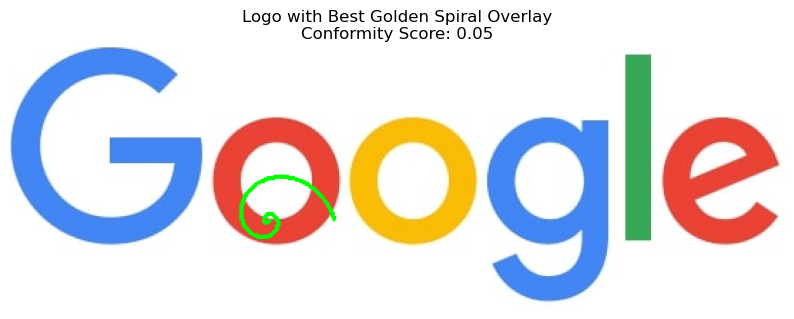

Best Conformity Score (Normalized 0-1): 0.05


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate an equiangular spiral (Golden Spiral)
def generate_golden_spiral(width, height, num_points=1000, a=1, center_x=None, center_y=None):
    """
    Generates points for an equiangular spiral based on the golden ratio.

    :param width: Width of the image
    :param height: Height of the image
    :param num_points: Number of points in the spiral
    :param a: Scaling factor for the spiral
    :param center_x: Custom x-center for the spiral
    :param center_y: Custom y-center for the spiral
    :return: x and y coordinates of the spiral
    """
    golden_angle = np.pi * (3 - np.sqrt(5))  # 137.5 degrees in radians
    theta = np.linspace(0, 4 * np.pi, num_points)  # 4 rotations
    r = a * np.exp(0.306349 * theta)  # Using golden ratio scaling (e^(1/phi))

    # Default center: middle of the image
    if center_x is None:
        center_x = width // 2
    if center_y is None:
        center_y = height // 2

    # Convert polar to Cartesian coordinates
    x = r * np.cos(theta) + center_x
    y = r * np.sin(theta) + center_y

    # Keep coordinates within image bounds
    x = np.clip(x, 0, width - 1).astype(int)
    y = np.clip(y, 0, height - 1).astype(int)

    return x, y

# Load the logo image
image_path = 'g.jpg'  # Replace with your logo image path
logo = cv2.imread(image_path)

if logo is None:
    print("Error: Image not found. Please check the file path.")
    exit()

# Resize image if needed
height, width, _ = logo.shape
resized_logo = cv2.resize(logo, (width, height))

# Convert to grayscale for edge detection
gray_logo = cv2.cvtColor(resized_logo, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_logo, 100, 200)

# Try multiple spiral placements (centered and offset)
centers = [
    (width // 2, height // 2),  # Center
    (width // 3, height // 3),  # Top-left
    (2 * width // 3, height // 3),  # Top-right
    (width // 3, 2 * height // 3),  # Bottom-left
    (2 * width // 3, 2 * height // 3),  # Bottom-right
]

best_score = 0
best_x, best_y = None, None

# Iterate over different centers and calculate conformity
for cx, cy in centers:
    x_coords, y_coords = generate_golden_spiral(width, height, center_x=cx, center_y=cy)

    # Compute Conformity Score based on Edge Alignment
    conformity_score = np.mean(edges[y_coords, x_coords])

    # Store the best spiral position
    if conformity_score > best_score:
        best_score = conformity_score
        best_x, best_y = x_coords, y_coords

# Normalize the score between 0 and 1
max_possible_score = 255  # Max pixel intensity (white edges)
normalized_score = best_score / max_possible_score

# Draw the best spiral on the image
spiral_overlay = resized_logo.copy()
for x, y in zip(best_x, best_y):
    cv2.circle(spiral_overlay, (x, y), 1, (0, 255, 0), -1)  # Green dots

# Display the logo with the best spiral overlay
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(spiral_overlay, cv2.COLOR_BGR2RGB))
plt.title(f'Logo with Best Golden Spiral Overlay\nConformity Score: {normalized_score:.2f}')
plt.axis('off')
plt.show()

print(f"Best Conformity Score (Normalized 0-1): {normalized_score:.2f}")

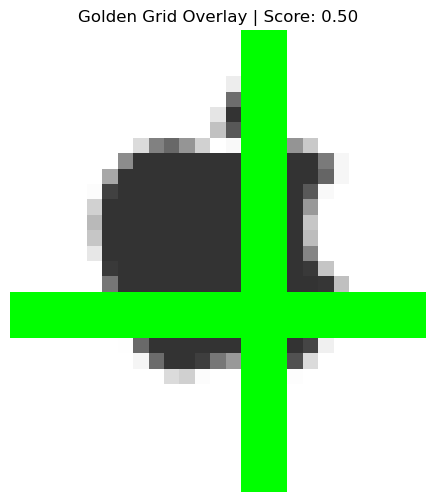

In [19]:
def calculate_conformity_score_grid(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    height, width, _ = img.shape

    # Define golden ratio (phi)
    golden_ratio = 1.618

    # Calculate golden ratio lines
    vertical_line = int(width / golden_ratio)
    horizontal_line = int(height / golden_ratio)

    grid_overlay = img.copy()
    # Draw golden ratio grid lines
    grid_overlay = cv2.line(grid_overlay, (vertical_line, 0), (vertical_line, height), (0, 255, 0), 2)
    grid_overlay = cv2.line(grid_overlay, (0, horizontal_line), (width, horizontal_line), (0, 255, 0), 2)

    # Calculate conformity score based on deviation
    width_score = abs((width / vertical_line) - golden_ratio) < 0.05  # Tolerance
    height_score = abs((height / horizontal_line) - golden_ratio) < 0.05
    conformity_score = (width_score + height_score) / 2

    # Plot the image and overlay
    plt.figure(figsize=(10, 6))
    plt.imshow(grid_overlay)
    plt.axis('off')
    plt.title(f"Golden Grid Overlay | Score: {conformity_score:.2f}")
    plt.show()

# Test with your brand logo
calculate_conformity_score_grid("apple.png")

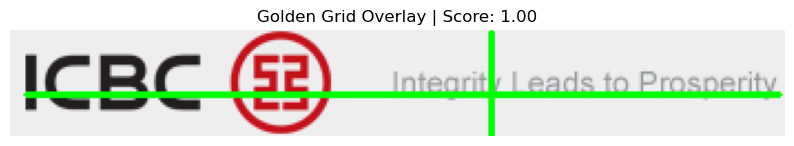

Conformity Score (Golden Grid): 1.00


In [33]:
def calculate_conformity_score_grid(image_path):
    # Load the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect edges and find contours
    edges = cv2.Canny(gray, 100, 200)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Determine bounding box of the logo
    x, y, w, h = cv2.boundingRect(np.concatenate(contours))

    # Calculate golden ratio lines relative to bounding box
    vertical_line = x + int(w / 1.618)
    horizontal_line = y + int(h / 1.618)

    # Draw golden ratio grid lines
    grid_overlay = img_rgb.copy()
    cv2.line(grid_overlay, (vertical_line, y), (vertical_line, y + h), (0, 255, 0), 2)
    cv2.line(grid_overlay, (x, horizontal_line), (x + w, horizontal_line), (0, 255, 0), 2)

    # Calculate conformity score based on alignment
    width_score = abs((w / (w / 1.618)) - 1.618) < 0.05  # Tolerance
    height_score = abs((h / (h / 1.618)) - 1.618) < 0.05
    conformity_score = (width_score + height_score) / 2

    # Plot the image with grid overlay
    plt.figure(figsize=(10, 6))
    plt.imshow(grid_overlay)
    plt.axis('off')
    plt.title(f"Golden Grid Overlay | Score: {conformity_score:.2f}")
    plt.show()

    print(f"Conformity Score (Golden Grid): {conformity_score:.2f}")

# Test with your brand logo
calculate_conformity_score_grid("icbc.jpg")

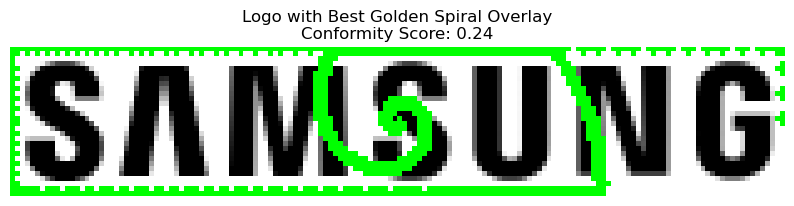

Best Conformity Score (Normalized 0-1): 0.24


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a dynamic golden spiral
def generate_golden_spiral(width, height, num_points=1000, a=1, scale_factor=1.0, center_x=None, center_y=None):
    """
    Generates points for a golden spiral dynamically scaled to the logo.
    
    :param width: Width of the image
    :param height: Height of the image
    :param num_points: Number of points in the spiral
    :param a: Base scaling factor for the spiral
    :param scale_factor: Additional scaling factor to dynamically fit contours
    :param center_x: Custom x-center for the spiral
    :param center_y: Custom y-center for the spiral
    :return: x and y coordinates of the spiral
    """
    golden_angle = np.pi * (3 - np.sqrt(5))  # 137.5 degrees in radians
    theta = np.linspace(0, 6 * np.pi, num_points)  # Increase rotations if needed
    r = a * scale_factor * np.exp(0.306349 * theta)  # Adjust scaling

    # Default center: middle of the image
    if center_x is None:
        center_x = width // 2
    if center_y is None:
        center_y = height // 2

    # Convert polar to Cartesian coordinates
    x = r * np.cos(theta) + center_x
    y = r * np.sin(theta) + center_y

    # Keep coordinates within image bounds
    x = np.clip(x, 0, width - 1).astype(int)
    y = np.clip(y, 0, height - 1).astype(int)

    return x, y

# Load the logo image
image_path = "samsung.png"  # Replace with your logo image path
logo = cv2.imread(image_path)

if logo is None:
    print("Error: Image not found. Please check the file path.")
    exit()

# Resize image if needed
height, width, _ = logo.shape
resized_logo = cv2.resize(logo, (width, height))

# Convert to grayscale for edge detection
gray_logo = cv2.cvtColor(resized_logo, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_logo, 100, 200)

# Detect contours to get a bounding box for the logo
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(np.concatenate(contours))

# Try multiple spiral placements and scales
centers = [
    (x + w // 2, y + h // 2),  # Center of the bounding box
    (x + w // 4, y + h // 4),  # Offset to top-left
    (x + 3 * w // 4, y + h // 4),  # Offset to top-right
    (x + w // 4, y + 3 * h // 4),  # Offset to bottom-left
    (x + 3 * w // 4, y + 3 * h // 4),  # Offset to bottom-right
]

best_score = 0
best_x, best_y = None, None
best_scale = None

# Iterate over centers and scales
for cx, cy in centers:
    for scale in np.linspace(0.5, 1.5, 10):  # Test different scales
        x_coords, y_coords = generate_golden_spiral(width, height, center_x=cx, center_y=cy, scale_factor=scale)

        # Compute conformity score based on edge alignment
        conformity_score = np.sum(edges[y_coords, x_coords]) / len(x_coords)  # Average intensity

        # Store the best spiral position
        if conformity_score > best_score:
            best_score = conformity_score
            best_x, best_y = x_coords, y_coords
            best_scale = scale

# Normalize the score between 0 and 1
max_possible_score = 255  # Max pixel intensity (white edges)
normalized_score = best_score / max_possible_score

# Draw the best spiral on the image
spiral_overlay = resized_logo.copy()
for x, y in zip(best_x, best_y):
    cv2.circle(spiral_overlay, (x, y), 1, (0, 255, 0), -1)  # Green dots

# Display the logo with the best spiral overlay
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(spiral_overlay, cv2.COLOR_BGR2RGB))
plt.title(f'Logo with Best Golden Spiral Overlay\nConformity Score: {normalized_score:.2f}')
plt.axis('off')
plt.show()

print(f"Best Conformity Score (Normalized 0-1): {normalized_score:.2f}")

Height of the bounding rectangle: 30 pixels
Width of the bounding rectangle: 156 pixels


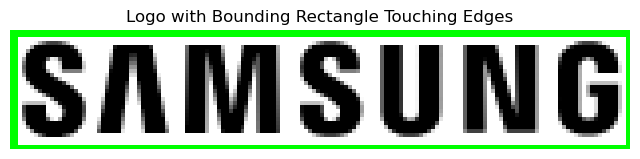

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the logo image
image = cv2.imread('samsung.png', cv2.IMREAD_UNCHANGED)  # Replace with your logo image path

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary mask
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find contours of the logo
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw a bounding rectangle touching the edges of the logo
if contours:
    # Find the outermost points of the logo
    x, y, w, h = cv2.boundingRect(contours[0])  # Bounding rectangle around the largest contour

    # Draw the rectangle on a copy of the original image
    rectangle_image = image.copy()
    cv2.rectangle(rectangle_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle

    # Height of the bounding rectangle (useful for text height)
    text_height = h
    print(f"Height of the bounding rectangle: {text_height} pixels")
    print(f"Width of the bounding rectangle: {w} pixels")

    # Convert image to RGB for Matplotlib
    rectangle_image_rgb = cv2.cvtColor(rectangle_image, cv2.COLOR_BGR2RGB)

    # Display the image with the bounding rectangle using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(rectangle_image_rgb)
    plt.title("Logo with Bounding Rectangle Touching Edges")
    plt.axis('off')
    plt.show()
else:
    print("No contours detected. Ensure the logo has visible and distinct edges.")


Height of the bounding rectangle: 184 pixels
Width of the bounding rectangle: 544 pixels


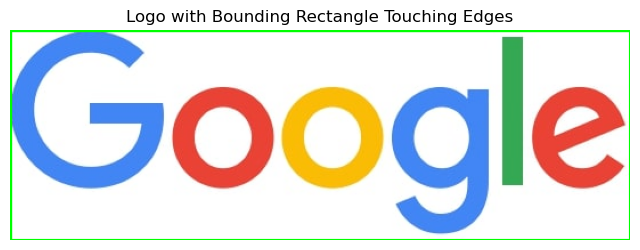

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the logo image
image = cv2.imread('google.jpg', cv2.IMREAD_UNCHANGED)  # Replace with your logo image path

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary mask
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find contours of the logo
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw a bounding rectangle touching the edges of the logo
if contours:
    # Find the outermost points of the logo
    x, y, w, h = cv2.boundingRect(contours[0])  # Bounding rectangle around the largest contour

    # Draw the rectangle on a copy of the original image
    rectangle_image = image.copy()
    cv2.rectangle(rectangle_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle

    # Height of the bounding rectangle (useful for text height)
    text_height = h
    print(f"Height of the bounding rectangle: {text_height} pixels")
    print(f"Width of the bounding rectangle: {w} pixels")

    # Convert image to RGB for Matplotlib
    rectangle_image_rgb = cv2.cvtColor(rectangle_image, cv2.COLOR_BGR2RGB)

    # Display the image with the bounding rectangle using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(rectangle_image_rgb)
    plt.title("Logo with Bounding Rectangle Touching Edges")
    plt.axis('off')
    plt.show()
else:
    print("No contours detected. Ensure the logo has visible and distinct edges.")

Height of the bounding rectangle: 184 pixels
Width of the bounding rectangle: 544 pixels
Aspect Ratio (W/H): 2.957
Golden Ratio Conformity Score: 17.27 / 100


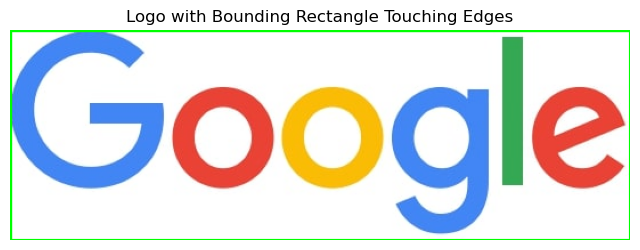

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the logo image
image = cv2.imread('google.jpg', cv2.IMREAD_UNCHANGED)  # Replace with your logo image path

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary mask
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find contours of the logo
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw a bounding rectangle touching the edges of the logo
if contours:
    x, y, w, h = cv2.boundingRect(contours[0])  # Bounding rectangle around the largest contour

    # Calculate the aspect ratio
    aspect_ratio = w / h
    golden_ratio = 1.618

    # Calculate conformity score (0 to 100)
    # The closer the aspect ratio is to the golden ratio, the higher the score
    conformity_score = max(0, 100 - abs(aspect_ratio - golden_ratio) / golden_ratio * 100)

    # Print dimensions and conformity score
    print(f"Height of the bounding rectangle: {h} pixels")
    print(f"Width of the bounding rectangle: {w} pixels")
    print(f"Aspect Ratio (W/H): {aspect_ratio:.3f}")
    print(f"Golden Ratio Conformity Score: {conformity_score:.2f} / 100")

    # Draw rectangle
    rectangle_image = image.copy()
    cv2.rectangle(rectangle_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Convert to RGB for matplotlib
    rectangle_image_rgb = cv2.cvtColor(rectangle_image, cv2.COLOR_BGR2RGB)

    # Display with Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(rectangle_image_rgb)
    plt.title("Logo with Bounding Rectangle Touching Edges")
    plt.axis('off')
    plt.show()
else:
    print("No contours detected. Ensure the logo has visible and distinct edges.")


Height of the bounding rectangle: 48 pixels
Width of the bounding rectangle: 350 pixels
Aspect Ratio (W/H): 7.292
Golden Ratio Conformity Score (Normalized): 0


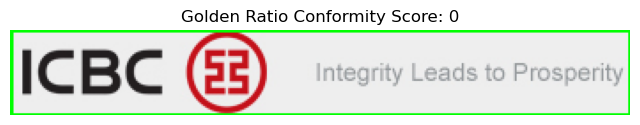

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the logo image
image = cv2.imread('icbc.jpg', cv2.IMREAD_UNCHANGED)  # Replace with your logo image path

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a binary mask
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find contours of the logo
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if contours:
    x, y, w, h = cv2.boundingRect(contours[0])

    aspect_ratio = w / h
    golden_ratio = 1.618

    # Normalize the difference to a score between 0 and 1
    # Max allowable deviation is arbitrarily set to 100% of the golden ratio
    max_deviation = golden_ratio  # you can adjust this for sensitivity
    deviation = abs(aspect_ratio - golden_ratio)
    normalized_score = max(0, 1 - (deviation / max_deviation))  # score in [0, 1]

    normalized_score = round(normalized_score, 4)  # Round for cleaner display

    # Print results
    print(f"Height of the bounding rectangle: {h} pixels")
    print(f"Width of the bounding rectangle: {w} pixels")
    print(f"Aspect Ratio (W/H): {aspect_ratio:.3f}")
    print(f"Golden Ratio Conformity Score (Normalized): {normalized_score}")

    # Draw rectangle on image
    rectangle_image = image.copy()
    cv2.rectangle(rectangle_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Convert to RGB for matplotlib
    rectangle_image_rgb = cv2.cvtColor(rectangle_image, cv2.COLOR_BGR2RGB)

    # Show image with score in title
    plt.figure(figsize=(8, 6))
    plt.imshow(rectangle_image_rgb)
    plt.title(f"Golden Ratio Conformity Score: {normalized_score}")
    plt.axis('off')
    plt.show()
else:
    print("No contours detected. Ensure the logo has visible and distinct edges.")


Text vertical height (top of tallest to bottom of lowest): 47 pixels


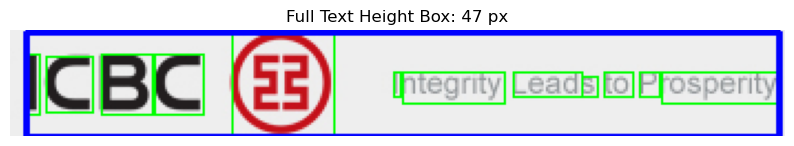

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_largest_text_height_box(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at: {image_path}")

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive threshold
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 2
    )

    # Dilation to connect components
    kernel = np.ones((2, 2), np.uint8)
    thresh = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize bounding coordinates
    min_area = 30
    min_aspect_ratio = 0.1
    max_aspect_ratio = 10
    top = float('inf')
    bottom = 0
    left = float('inf')
    right = 0
    text_boxes = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        area = w * h
        aspect_ratio = w / h

        if area > min_area and min_aspect_ratio < aspect_ratio < max_aspect_ratio:
            top = min(top, y)
            bottom = max(bottom, y + h)
            left = min(left, x)
            right = max(right, x + w)
            text_boxes.append((x, y, w, h))
            # Optional: draw individual boxes (green)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)

    if not text_boxes:
        print("No text detected.")
        return

    # Final full height box
    full_text_height = bottom - top
    full_box_top_left = (left, top)
    full_box_bottom_right = (right, bottom)

    # Draw the full text height box (blue)
    cv2.rectangle(image, full_box_top_left, full_box_bottom_right, (255, 0, 0), 2)

    print(f"Text vertical height (top of tallest to bottom of lowest): {full_text_height} pixels")

    # Convert BGR to RGB for matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.imshow(image_rgb)
    plt.title(f"Full Text Height Box: {full_text_height} px")
    plt.axis('off')
    plt.show()

# Example usage
image_path = "icbc.jpg"  # Replace with your logo image path
draw_largest_text_height_box(image_path)
